In [2]:
'''
    This function will be used for
    -   taking a dataset in
    -   temporary removal of all targets
    -   and analyzing orthogonality with PCA decomposition
'''
#imports
import pandas as pd
import numpy as np

#read in data - NOTE changeable name
data = pd.read_csv('ds1_beta.csv')

#remove all targets - NOTE current solution, may change
data = data.drop(columns=[f't_{i}' for i in range(1,61)])

In [3]:
#introduce PCA

from sklearn.decomposition import PCA
pca = PCA()

#normalize before PCA utilization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

#fit scaler
X_normalized = scaler.fit_transform(data)
#fit pca
X = pca.fit_transform(X_normalized)

#print(pca.get_covariance()) #optional printout, buggy in jn

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.81614198e-01 2.12285948e-01 5.27476285e-02 3.94831717e-02
 2.64679425e-02 2.21316500e-02 1.38446149e-02 9.64841433e-03
 9.28446345e-03 7.24941435e-03 6.83329440e-03 6.57466999e-03
 6.46856090e-03 6.27897317e-03 5.56881151e-03 5.07731396e-03
 4.66631163e-03 4.45324261e-03 4.24739253e-03 4.13482909e-03
 4.05767256e-03 3.97527510e-03 3.93600715e-03 3.89570124e-03
 3.83542643e-03 3.79563813e-03 3.75808452e-03 3.73055204e-03
 3.71756662e-03 3.70687564e-03 3.68425851e-03 3.67000599e-03
 3.66401495e-03 3.64492238e-03 3.61690811e-03 3.60488719e-03
 3.58794755e-03 3.56843528e-03 3.54310977e-03 3.52074267e-03
 3.51234518e-03 3.47926382e-03 3.47548009e-03 3.45184466e-03
 3.42924157e-03 3.42452673e-03 3.41354039e-03 3.40930531e-03
 3.40069208e-03 3.37473510e-03 3.36231329e-03 3.34797335e-03
 3.33422432e-03 3.31463079e-03 3.31067469e-03 3.30615093e-03
 3.29262972e-03 3.28531513e-03 3.28012504e-03 3.26880807e-03
 3.25805023e-03 3.24745630e-03 3.23629088e-03 3.12270721e-03
 3.10832116e-03 3.029554

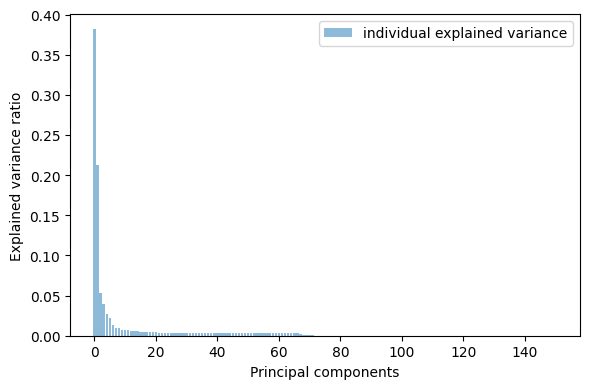

In [4]:
import matplotlib.pyplot as plt

#plot current info collection

plt.figure(figsize=(6, 4))

plt.bar(range(X.shape[1]), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Working with 151 features



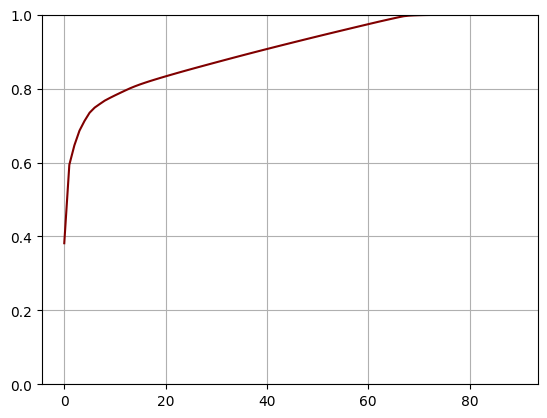

In [5]:
X_normalized = StandardScaler().fit_transform(data)

print(f'Working with {X_normalized.shape[1]} features\n')

dimensionality = 90

data_loss = []
for i in range(dimensionality):
    pca = PCA(n_components = i+1)
    pca.fit(X_normalized)
    X_new = pca.transform(X_normalized)
    retained_variance = np.sum(pca.explained_variance_ratio_)
    data_loss.append(retained_variance)

plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0,1)
plt.show()